# Plot data site_no

## General Preparation

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv('../data/2_DateSet_NotNormalized.gz'  ,compression='gzip', parse_dates=["date"])
data_set

,site_no,site_desc,date,hourly_traffic,temperature_2m,apparent_temperature,relative_humidity_2m,precipitation,wind_speed_10m,cloud_cover,day_of_week,holiday
0,1.0,SIGNALISED 4 WAY INTERSECTION,2010-01-01 00:00:00,4167.0,23.539999,24.445896,52.424004,0.0,7.862518,0.9,4,1.0
1,2.0,SIGNALISED T-JUNCTION,2010-01-01 00:00:00,1932.0,23.539999,24.445896,52.424004,0.0,7.862518,0.9,4,1.0
2,3.0,SIGNALISED 4 WAY INTERSECTION,2010-01-01 00:00:00,2316.0,23.539999,24.445896,52.424004,0.0,7.862518,0.9,4,1.0
3,4.0,SIGNALISED 4 WAY INTERSECTION,2010-01-01 00:00:00,1699.0,23.539999,24.445896,52.424004,0.0,7.862518,0.9,4,1.0
4,5.0,SIGNALISED 4 WAY INTERSECTION,2010-01-01 00:00:00,1835.0,23.539999,24.445896,52.424004,0.0,7.862518,0.9,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5346523,118.0,SIGNALISED T-JUNCTION,2014-12-31 23:00:00,1845.0,25.689999,24.791649,36.087940,0.0,5.351785,22.2,2,0.0
5346524,119.0,SIGNALISED T-JUNCTION,2014-12-31 23:00:00,962.0,25.689999,24.791649,36.087940,0.0,5.351785,22.2,2,0.0
5346525,120.0,SIGNALISED PEDESTRIAN CROSSING,2014-12-31 23:00:00,210.0,25.689999,24.791649,36.087940,0.0,5.351785,22.2,2,0.0
5346526,121.0,SIGNALISED PEDESTRIAN CROSSING,2014-12-31 23:00:00,74.0,25.689999,24.791649,36.087940,0.0,5.351785,22.2,2,0.0


##### Data extraction from a single site

In [3]:
Site_No = 10
Site_data = data_set[data_set.site_no == Site_No].drop(columns=['site_desc','site_no']).reset_index(drop=True)

def get_Consecutive_Days(N_week : int = 0, N_Days : int = 1, src : pd.DataFrame = Site_data) -> pd.DataFrame:
    start = src.loc[src.day_of_week == 0].index[N_week*24]
    end = start + N_Days * 24
    return src[start : end].set_index("date")

def generate_ticks_and_labels(Days : int = 1, Step : int = 1) -> tuple[list[int], list[str]]:
    ticks = []
    labels = []
    for day in range(Days): # Itera attraverso i 7 giorni della settimana
        for hour in range(0, 24, Step): # Itera attraverso le ore del giorno con un passo di 2
            tick = day * 24 + hour # Calcola il tick per l'orario corrente
            ticks.append(tick)
            if Days != 1: # Formatta l'etichetta come un orario del giorno
                labels.append(f"{day:2}D {hour:02}h") 
            else :
                labels.append(f"{hour:02}h") 
    return ticks, labels

## General Information

In [4]:
data_set.drop_duplicates(subset='site_no')["site_desc"].value_counts()

site_desc
SIGNALISED 4 WAY INTERSECTION     69
SIGNALISED T-JUNCTION             29
SIGNALISED PEDESTRIAN CROSSING    24
Name: count, dtype: int64

In [5]:
Site_data.head()

,date,hourly_traffic,temperature_2m,apparent_temperature,relative_humidity_2m,precipitation,wind_speed_10m,cloud_cover,day_of_week,holiday
0,2010-01-01 00:00:00,608.0,23.539999,24.445896,52.424004,0.0,7.862518,0.9,4,1.0
1,2010-01-01 01:00:00,576.0,25.490000,26.860800,47.725876,0.0,11.212135,0.0,4,1.0
2,2010-01-01 02:00:00,396.0,27.039999,28.257778,44.841870,0.0,16.489416,0.0,4,1.0
3,2010-01-01 03:00:00,266.0,27.789999,28.697495,43.756590,0.0,20.188908,0.0,4,1.0
4,2010-01-01 04:00:00,241.0,27.990000,28.495106,43.670140,0.0,22.406927,0.0,4,1.0


In [6]:
Site_data.drop(columns="day_of_week").describe().T

,count,mean,min,25%,50%,75%,max,std
date,43824,2012-07-01 23:30:00,2010-01-01 00:00:00,2011-04-02 11:45:00,2012-07-01 23:30:00,2013-10-01 11:15:00,2014-12-31 23:00:00,NaN
hourly_traffic,43824.0,986.861697,0.0,242.0,850.0,1589.0,3350.0,769.053672
temperature_2m,43824.0,16.661714,2.34,12.240001,15.490001,20.09,40.39,6.032311
apparent_temperature,43824.0,14.436455,-0.994742,9.30808,13.137137,18.516705,41.426617,6.882782
relative_humidity_2m,43824.0,65.731722,8.137084,51.69101,67.94675,82.00768,100.0,19.798492
precipitation,43824.0,0.050244,0.0,0.0,0.0,0.0,7.8,0.249313
wind_speed_10m,43824.0,16.020402,0.0,10.296251,15.192682,20.991426,56.335114,7.717499
cloud_cover,43824.0,33.866728,0.0,3.0,28.8,55.8,100.0,31.172622
holiday,43824.0,0.021358,0.0,0.0,0.0,0.0,1.0,0.144577


# General plots related to traffic

### Traffic and Weather on a Day

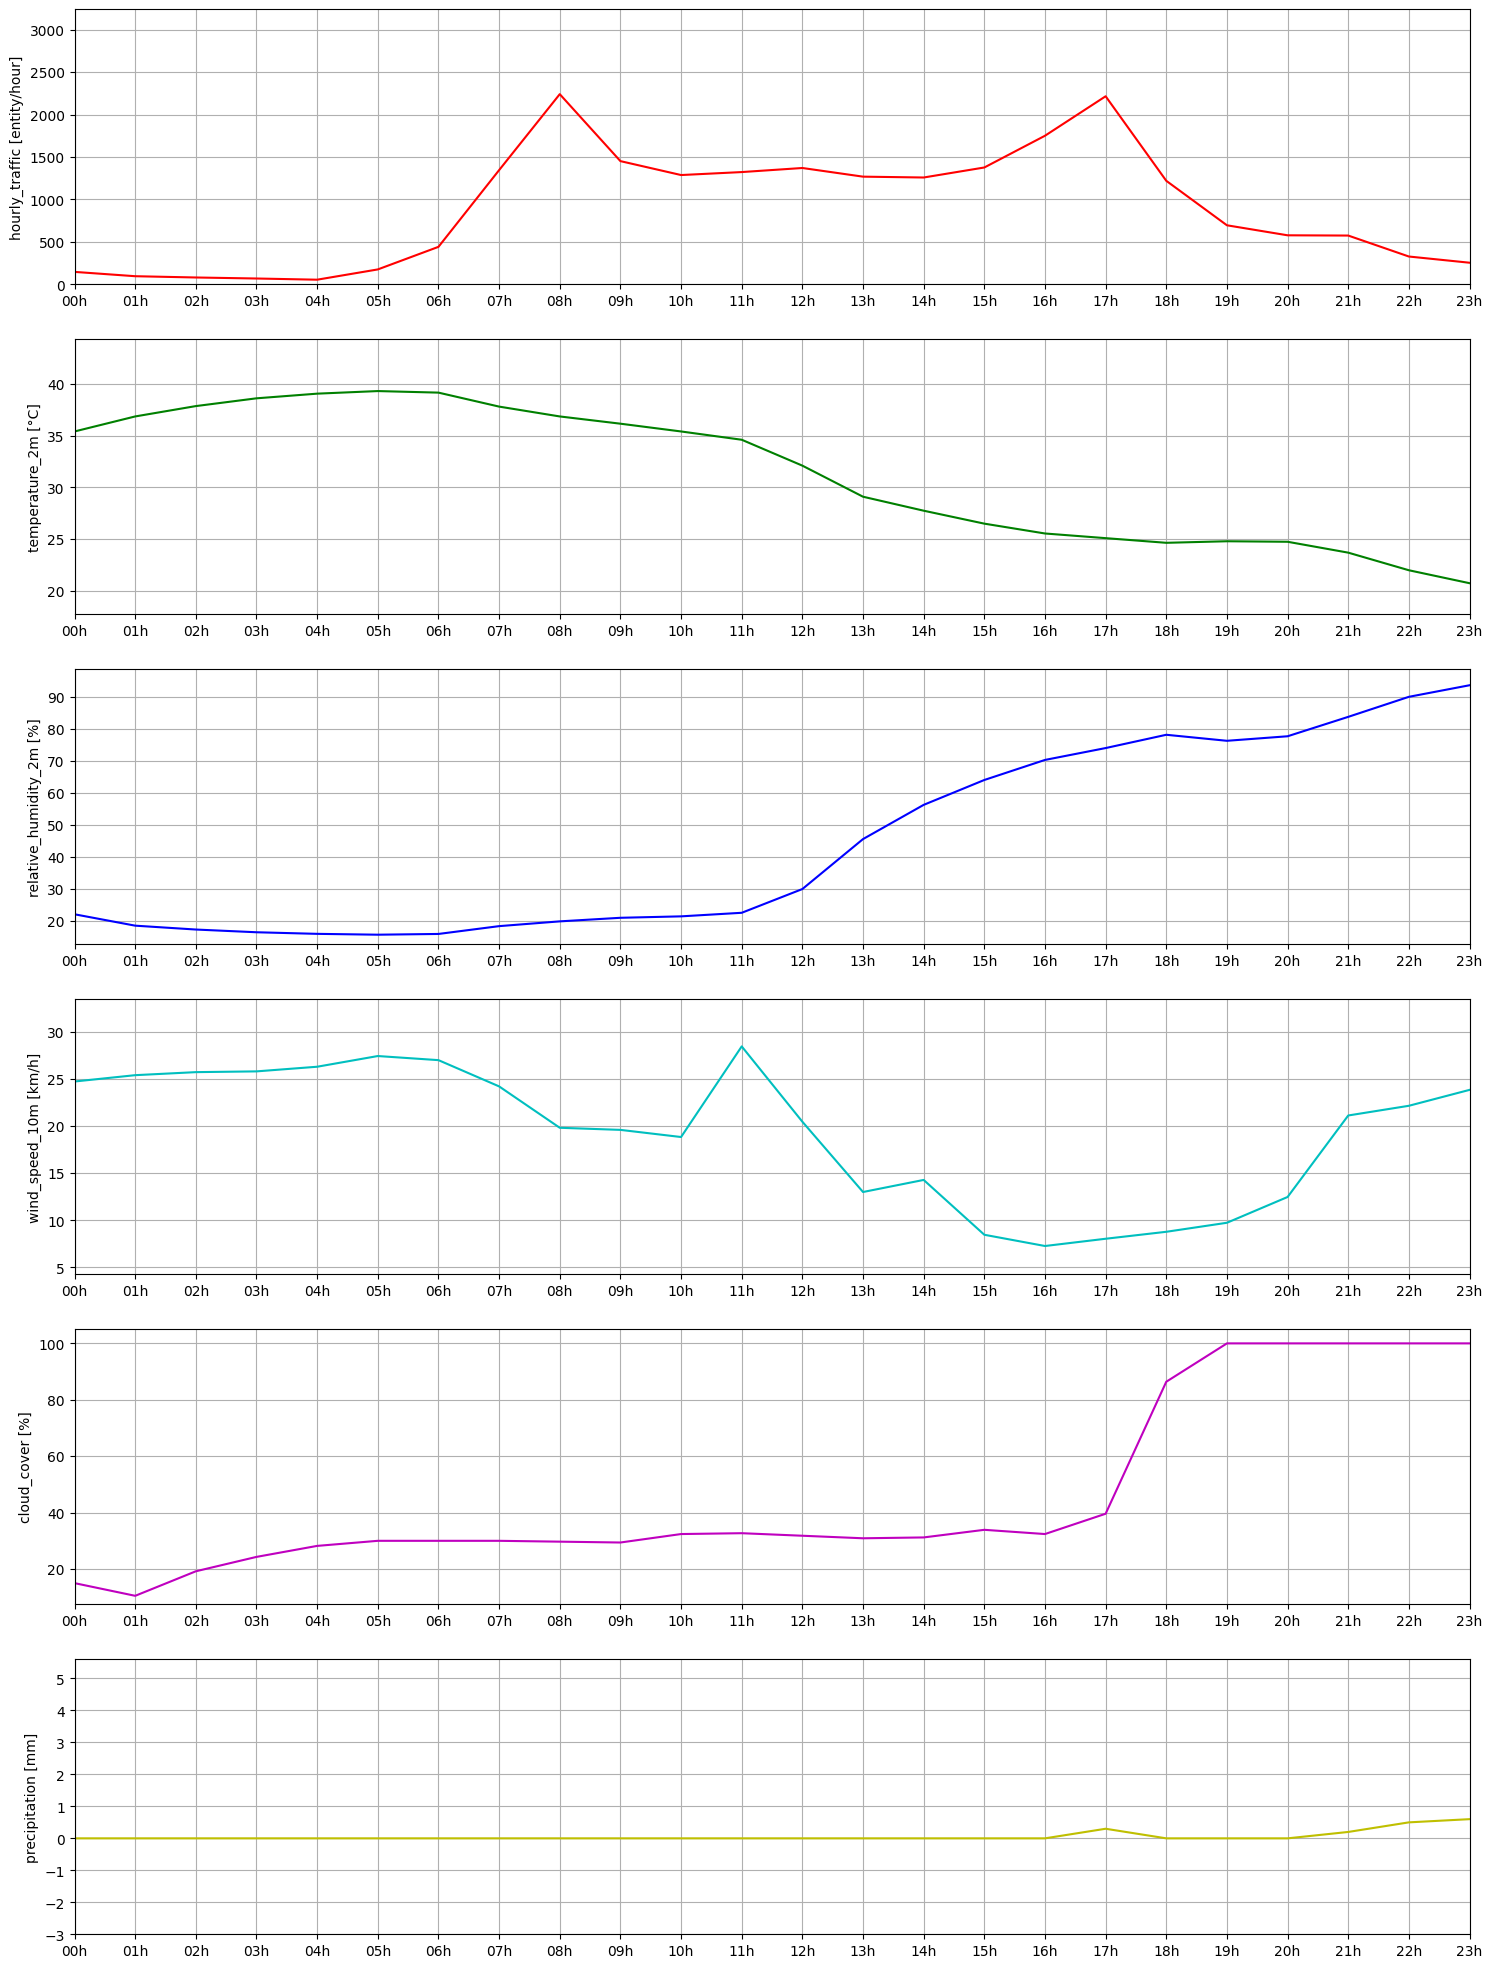

In [7]:
Day = get_Consecutive_Days(N_week=1, N_Days=1).reset_index(drop=True)

x_ticks, x_labels = generate_ticks_and_labels(Days = 1, Step=1)
data_unit   = [' [entity/hour]', ' [°C]', ' [%]', ' [km/h]', ' [%]', ' [mm]']
data_keys   = ['hourly_traffic', 'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'cloud_cover', 'precipitation']
plot_colors = ['r', 'g', 'b', 'c', 'm', 'y']

#creazione del grafico per il traffico settimanale (scelta il primo giorno di marzo)
fig, axs = plt.subplots(6, 1, figsize=(18, 25))
for j in range(len(data_keys)):
    plot_data = Day[data_keys[j]]
    axs[j].plot(plot_data, plot_colors[j])

    axs[j].set_ylabel(data_keys[j]+data_unit[j])

    axs[j].set_xticks(ticks=x_ticks)
    axs[j].set_xticklabels(labels=x_labels)

    axs[j].grid()
    axs[j].margins(0)

    if max(plot_data) > 1000 :
        axs[j].set_ylim(bottom = 0 , top=max(plot_data)+1000)
    else :
        axs[j].set_ylim(bottom = min(plot_data)-3 , top=max(plot_data)+5)
plt.savefig('img/Site_Plot_10/1_week.svg')
plt.show()

del Day, axs, fig, data_unit, data_keys, plot_colors, x_ticks, x_labels

### Traffic and Weather over a Week

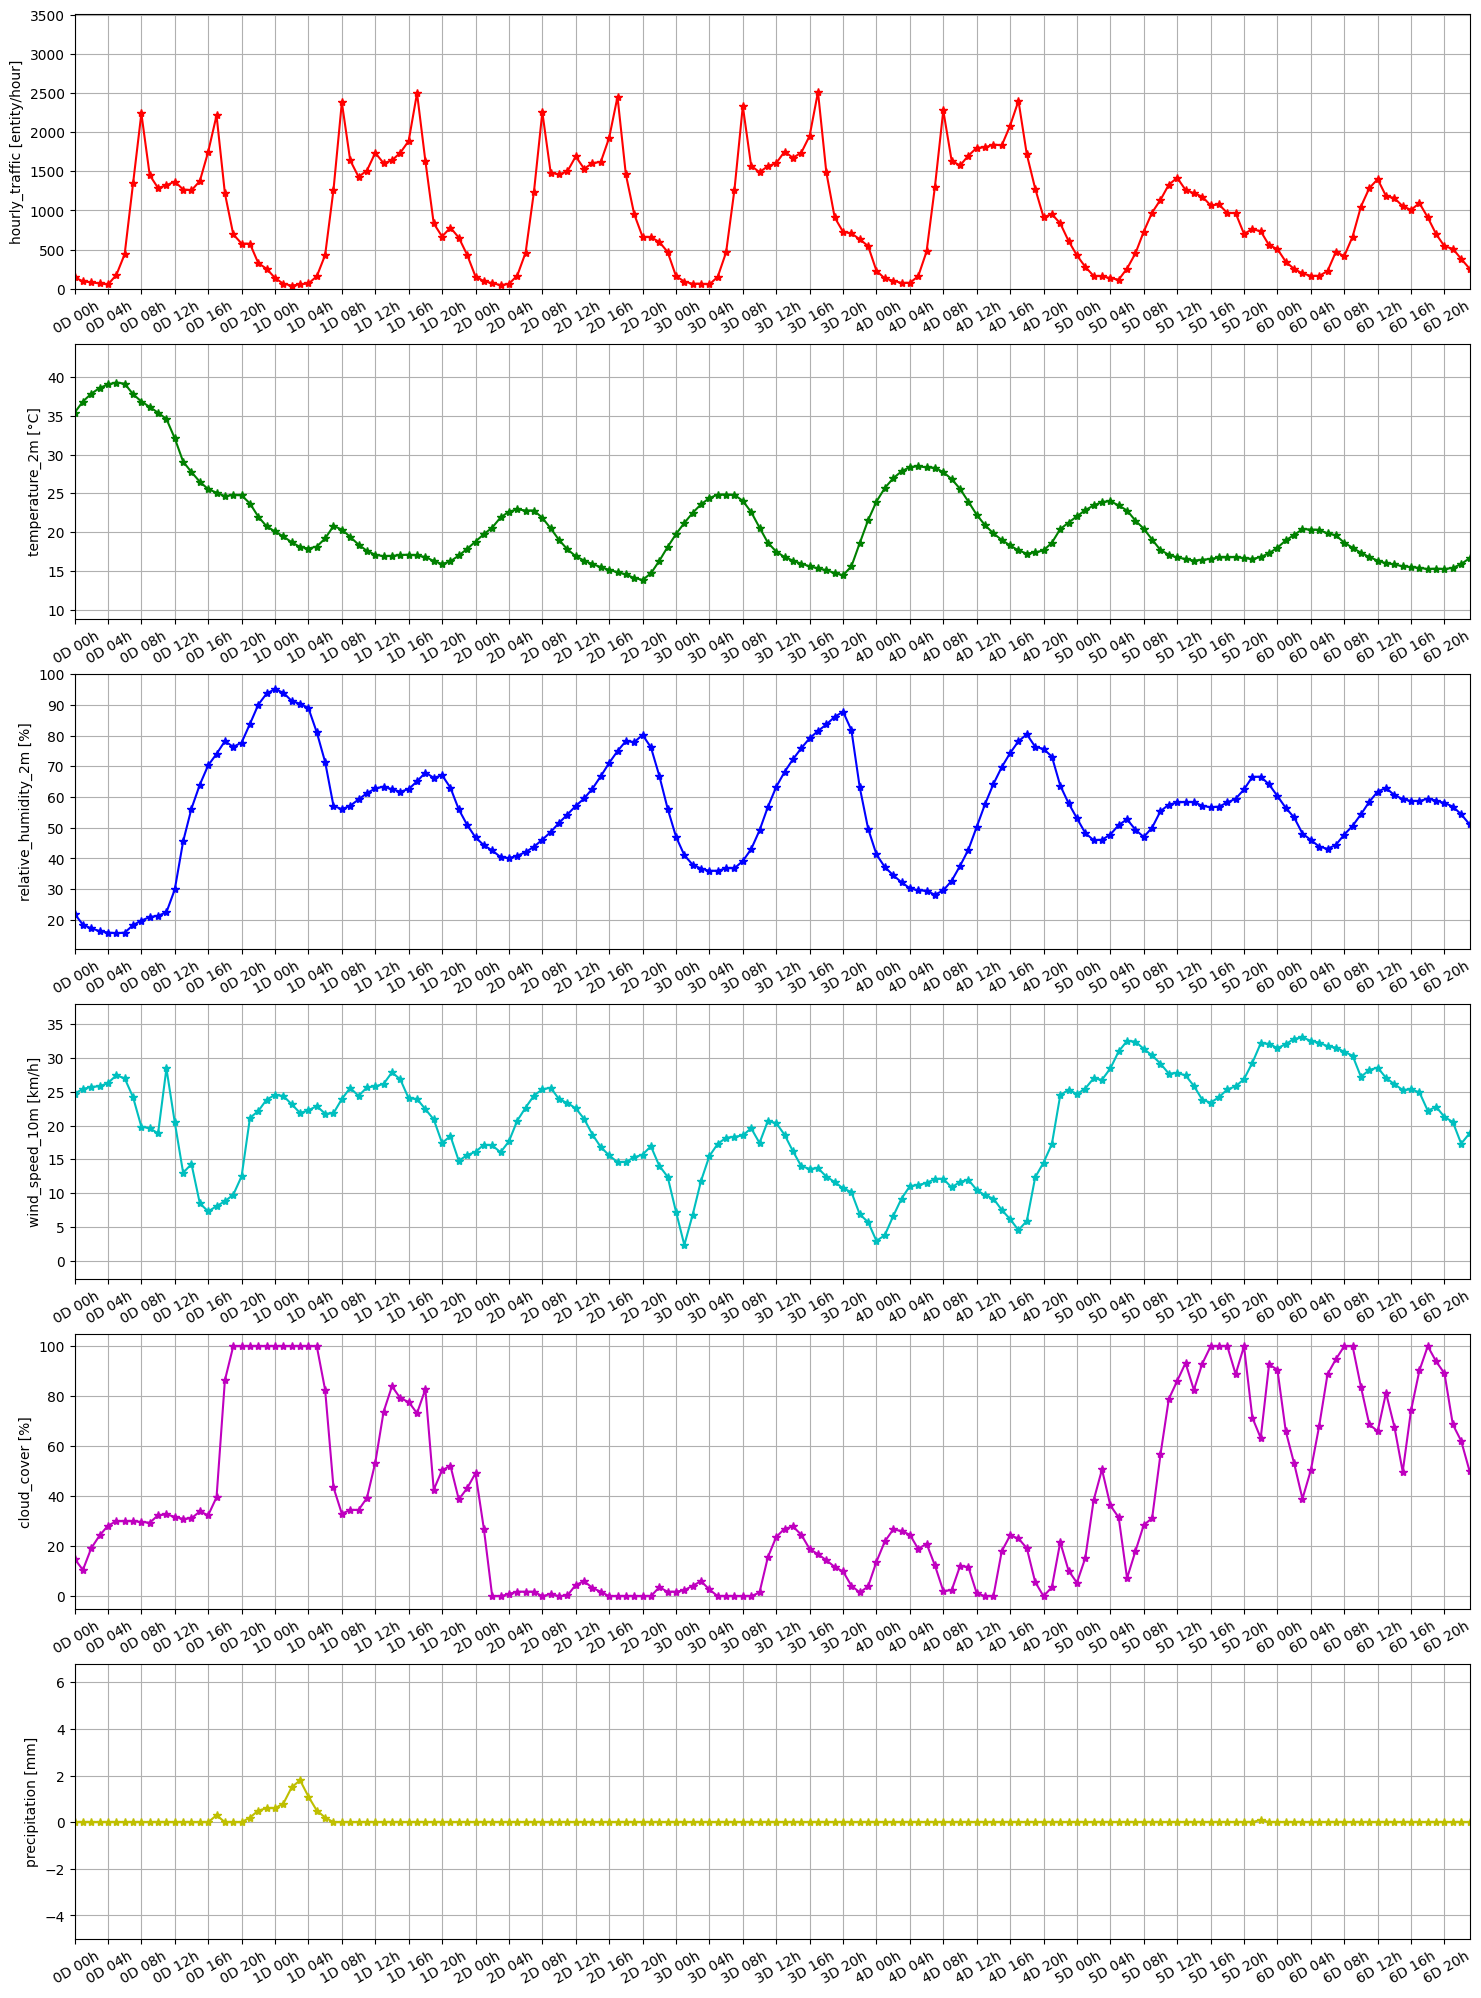

In [8]:
one_Week = get_Consecutive_Days(N_week = 1, N_Days = 7).reset_index(drop=True)
data_unit = [' [entity/hour]', ' [°C]', ' [%]', ' [km/h]', ' [%]', ' [mm]']
data_keys = ['hourly_traffic', 'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'cloud_cover', 'precipitation']
plot_colors = ['r', 'g', 'b', 'c', 'm', 'y']
ticks, labels = generate_ticks_and_labels(Days = 7, Step = 4)

#creazione del grafico per il traffico settimanale (scelta il primo giorno di marzo)
fig, axs = plt.subplots(6, 1, figsize=(18, 25))
for j in range(len(data_keys)):
    plot_data = one_Week[data_keys[j]]
    axs[j].plot(plot_data, plot_colors[j], marker="*")

    axs[j].set_ylabel(data_keys[j]+data_unit[j])
    axs[j].set_xticks(ticks=ticks)
    axs[j].set_xticklabels(labels=labels, rotation=30)

    axs[j].margins(0)
    axs[j].set_ylim(bottom=0)
    axs[j].grid()

    if max(plot_data) > 1000 :
        axs[j].set_ylim( bottom = 0 , top=max(plot_data)+1000)
    else :
        axs[j].set_ylim( bottom = min(plot_data)-5 , top=max(plot_data)+5)
plt.savefig('img/Site_Plot_10/1_week.svg')
plt.show()

del labels, ticks, axs, one_Week, data_unit, data_keys, plot_colors

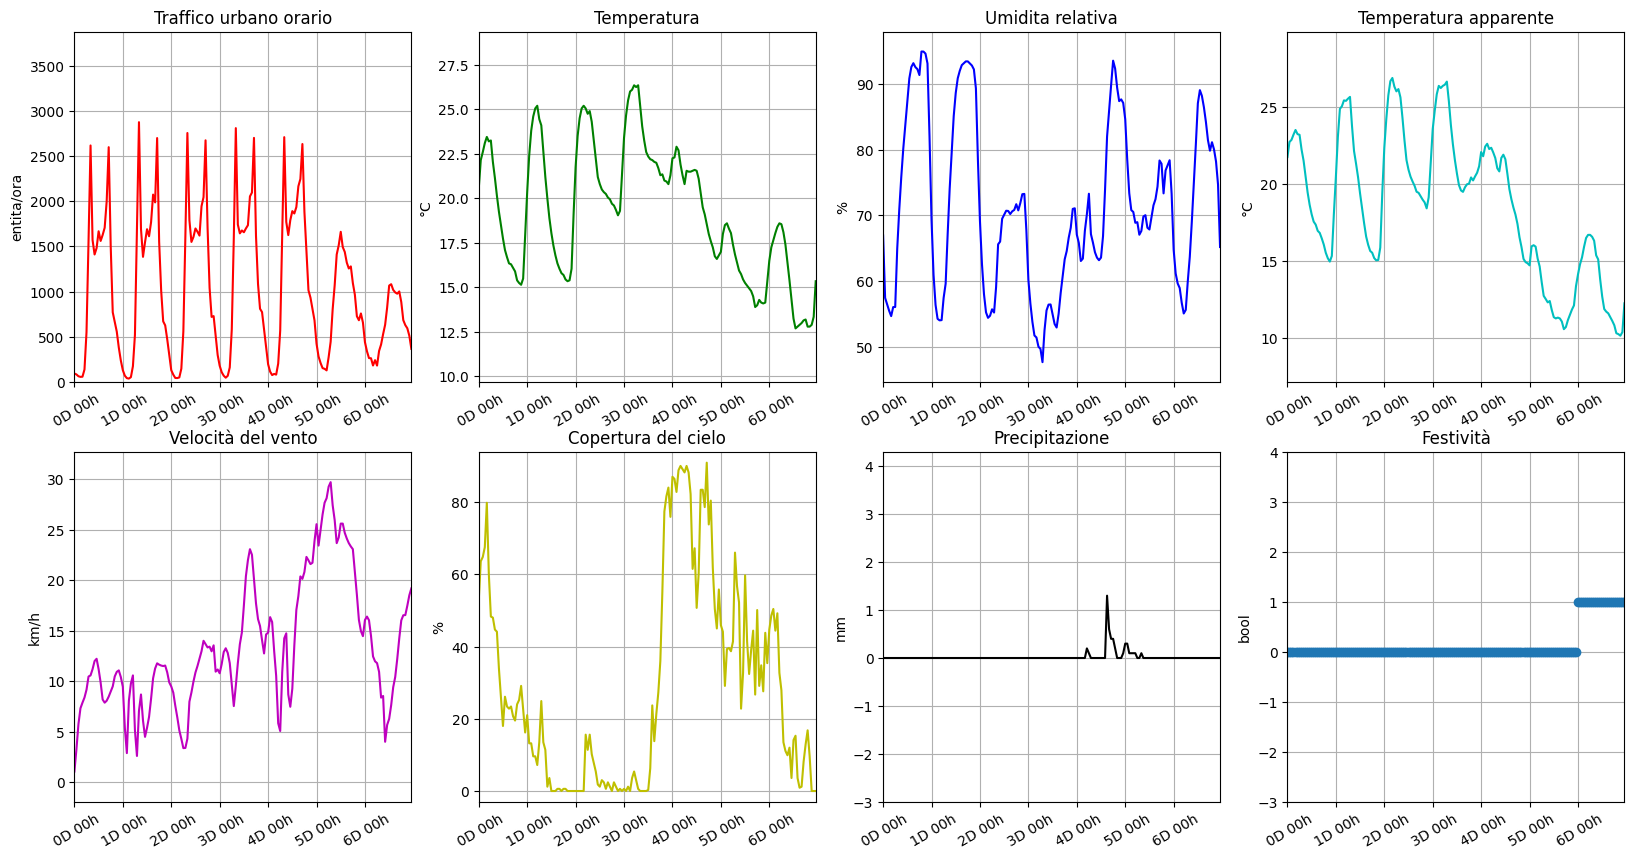

In [9]:
Day = get_Consecutive_Days(N_week=15, N_Days=7).reset_index(drop=True)

x_ticks, x_labels = generate_ticks_and_labels(Days = 7, Step=24)
data_unit    = ['entita/ora', '°C', '%','°C', 'km/h', '%', 'mm','bool']
data_title   = ['Traffico urbano orario', 'Temperatura', 'Umidita relativa',"Temperatura apparente", 'Velocità del vento', 'Copertura del cielo', 'Precipitazione','Festività']
data_keys    = ['hourly_traffic', 'temperature_2m', 'relative_humidity_2m','apparent_temperature', 'wind_speed_10m', 'cloud_cover', 'precipitation','holiday']
plot_colors  = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'o',]

#creazione del grafico per il traffico settimanale (scelta il primo giorno di marzo)
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()
for j in range(len(data_keys)):
    plot_data = Day[data_keys[j]]
    axs[j].plot(plot_data, plot_colors[j])
    axs[j].set_title(data_title[j])

    axs[j].set_ylabel(data_unit[j])

    axs[j].set_xticks(ticks=x_ticks)
    axs[j].set_xticklabels(labels=x_labels, rotation=30)

    axs[j].grid()
    axs[j].margins(0)

    if max(plot_data) > 1000 :
        axs[j].set_ylim(bottom = 0 , top=max(plot_data)+1000)
    else :
        axs[j].set_ylim(bottom = min(plot_data)-3, top=max(plot_data)+3)
plt.savefig('img/Site_Plot_10/1_week_alt.svg')
plt.show()

del Day, axs, fig, data_unit, data_keys, plot_colors, x_ticks, x_labels

### Traffic of 8 consecutive weeks

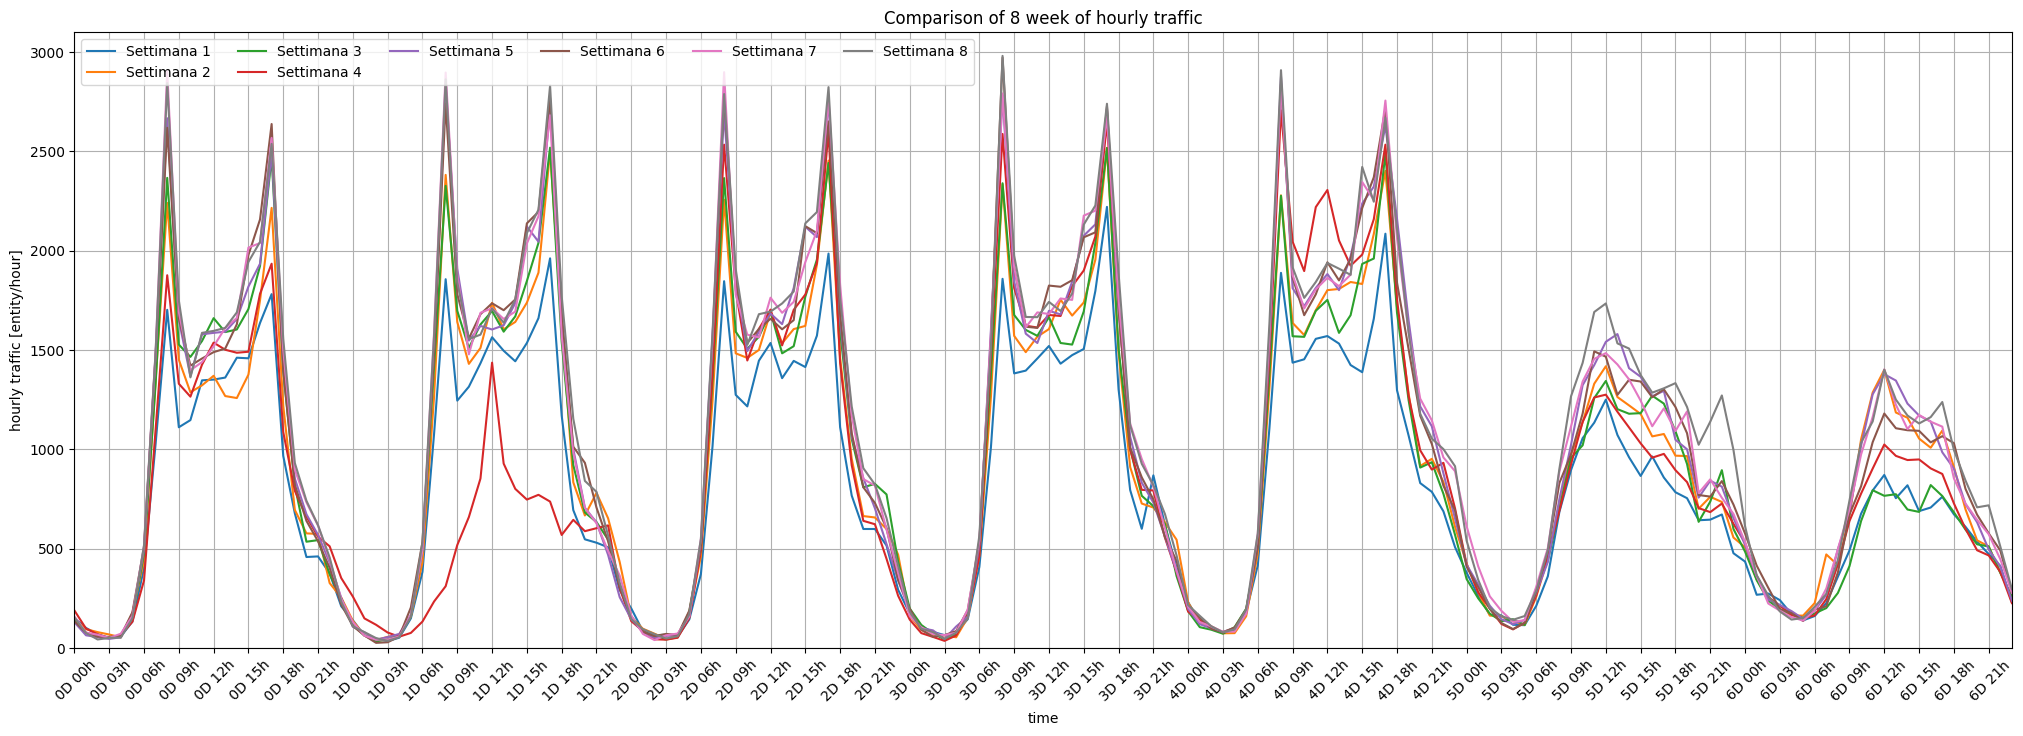

In [10]:
plt.figure(figsize=(25,8))
ticks, labels = generate_ticks_and_labels(Days = 7, Step=3)
for i in range(0,8) :
    Traffic = get_Consecutive_Days(N_week=i,N_Days=7).reset_index(drop=True)
    plt.plot(Traffic["hourly_traffic"], label=f"Settimana {i+1}")

plt.title("Comparison of 8 week of hourly traffic")

plt.xticks(ticks=ticks, labels=labels, rotation=45)

plt.xlabel("time")
plt.ylabel("hourly traffic [entity/hour]")


plt.margins(0)
plt.ylim(bottom = 0, top=3100)

plt.legend(frameon=True, ncol=6)
plt.grid()
plt.savefig('img/Site_Plot_10/multiple_week_comparison.svg')
plt.show()
del ticks, labels

#### Zoom on Monday traffic

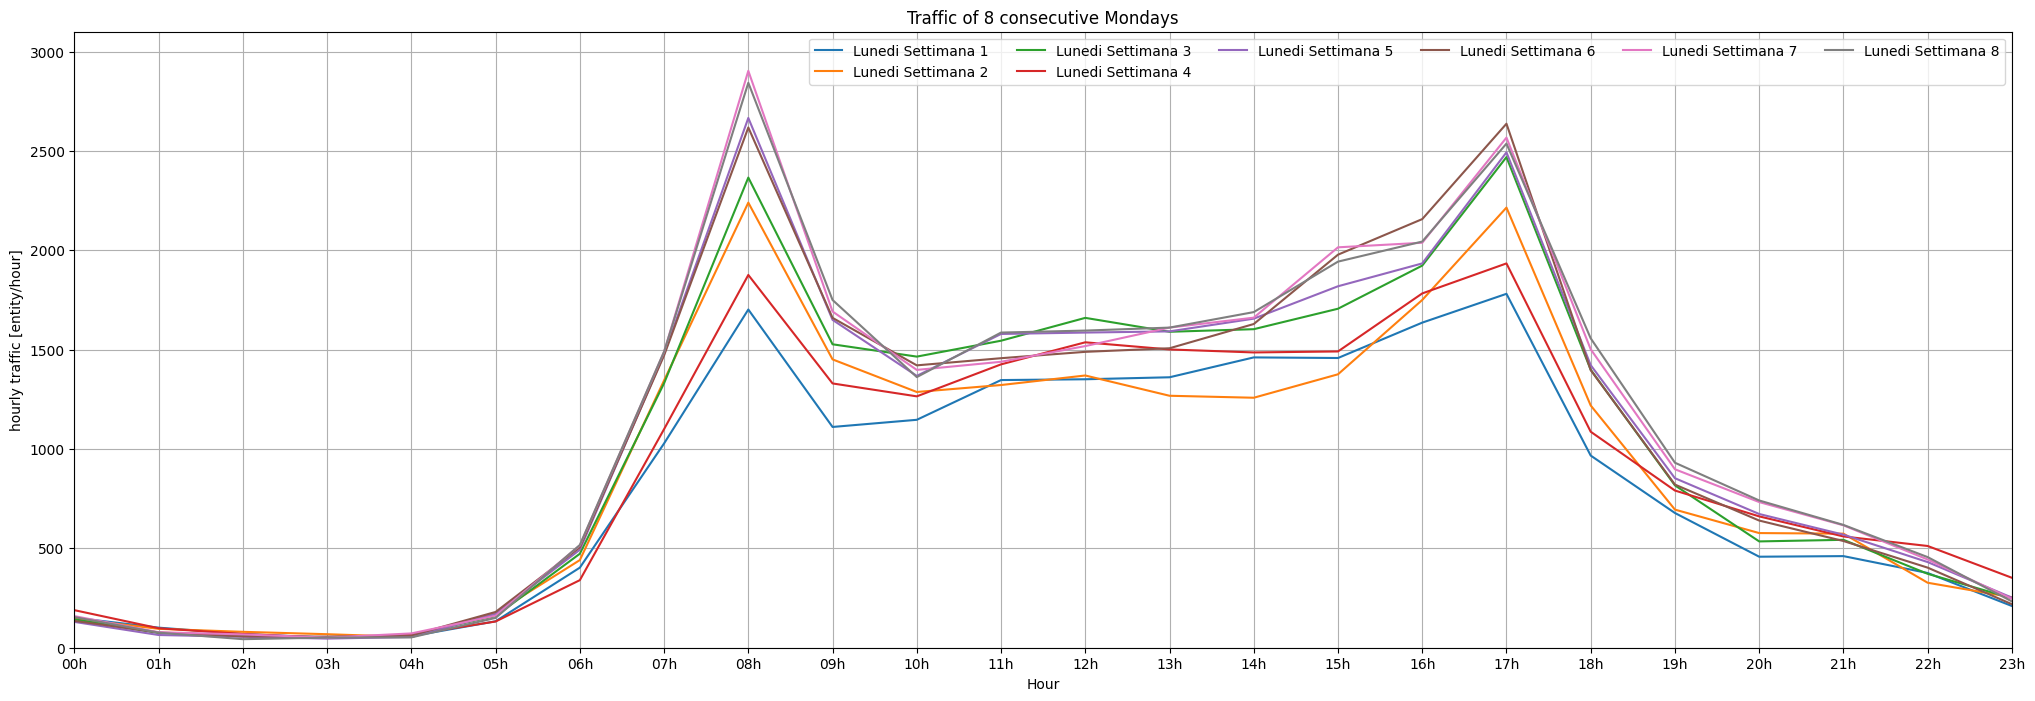

In [11]:
plt.figure(figsize=(25,8))
ticks, labels = generate_ticks_and_labels(Days = 1, Step=1)

for i in range(0,8) :
    Traffic = get_Consecutive_Days(N_week=i ,N_Days=1)
    Day = Traffic.loc[(Traffic.day_of_week == 0)]
    plt.plot(Day["hourly_traffic"].reset_index(drop=True), label=f"Lunedi Settimana {i+1}")

plt.title("Traffic of 8 consecutive Mondays")
plt.xlabel("Hour")
plt.ylabel("hourly traffic [entity/hour]")

plt.xticks(ticks=ticks, labels=labels)

plt.margins(0)
plt.ylim(bottom = 0, top=3100)

plt.legend(frameon=True, ncol=6)
#plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.grid()
plt.savefig('img/Site_Plot_10/monday_comparison.svg')
plt.show()
del labels, ticks

## Conversion of **Time of Day** and **Day of the Week** into sine and cosine

### Hour

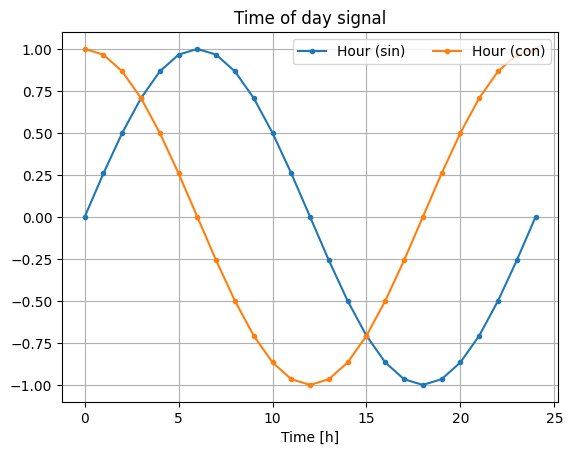

In [12]:
day = 24*60*60

timestamp_s = Site_data['date'].apply(lambda x: x.timestamp())

Site_data['day_sin'] = np.sin(timestamp_s * (2 * np.pi / day))
Site_data['day_cos'] = np.cos(timestamp_s * (2 * np.pi / day))

plt.plot(np.array(Site_data['day_sin'])[:25],marker='.', label="Hour (sin)")
plt.plot(np.array(Site_data['day_cos'])[:25],marker='.', label="Hour (con)")

plt.xlabel('Time [h]')
plt.title('Time of day signal')


plt.grid()
plt.legend(frameon=True, ncol=6)

plt.savefig('img/Circular_encoding/signal_hour_of_day.svg')
del timestamp_s, day

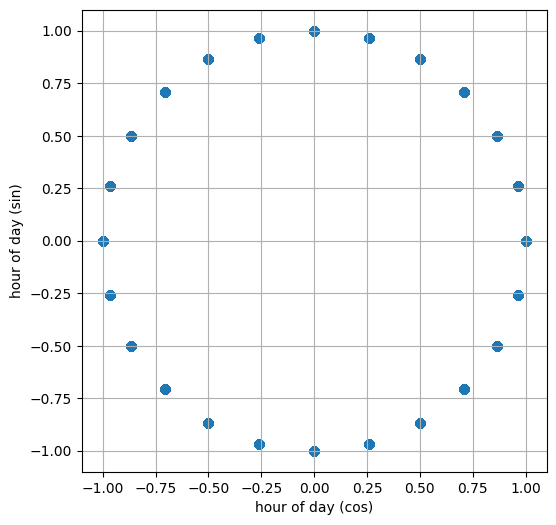

In [13]:
plt.subplots(figsize=(6,6))
plt.scatter(Site_data['day_sin'], Site_data['day_cos'])
plt.xlabel("hour of day (cos)")
plt.ylabel("hour of day (sin)")
plt.grid()
plt.savefig('img/Circular_encoding/circle_hour_of_day.svg')

### Week

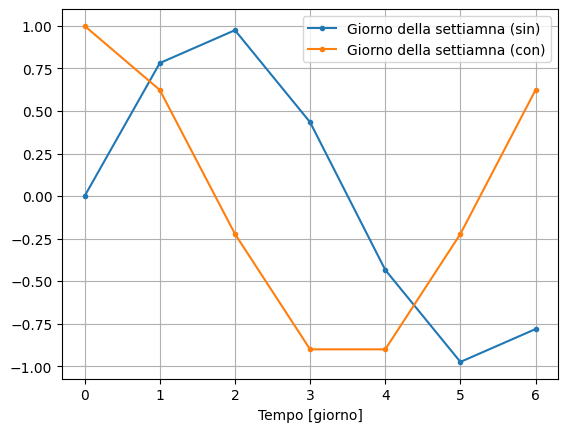

In [20]:
week = 7

Site_data['week_sin'] = np.sin(Site_data['day_of_week'] * (2 * np.pi / week))
Site_data['week_cos'] = np.cos(Site_data['day_of_week'] * (2 * np.pi / week))

plt_week = Site_data.drop_duplicates(subset='day_of_week').sort_values(by='day_of_week')


plt.plot(np.array(plt_week['week_sin'])[:24*7],marker='.', label="Giorno della settiamna (sin)")
plt.plot(np.array(plt_week['week_cos'])[:24*7],marker='.', label="Giorno della settiamna (con)")

plt.xlabel('Tempo [giorno]')
# plt.title('Time of week signal')
plt.grid()
plt.legend()
plt.savefig('img/Circular_encoding/signal_day_of_week.svg')
del week

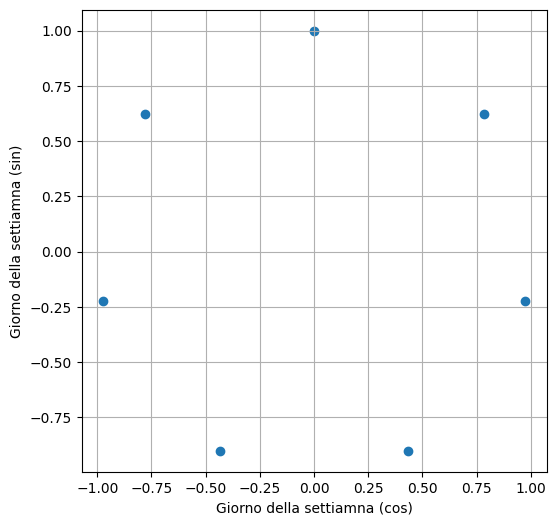

In [18]:
plt.subplots(figsize=(6,6))
plt.scatter(plt_week['week_sin'], plt_week['week_cos'])

plt.xlabel("Giorno della settiamna (cos)")
plt.ylabel("Giorno della settiamna (sin)")
plt.grid()
plt.savefig('img/Circular_encoding/circle_day_of_week.svg')
del plt_week

## Correlation

### Scatter Day/Traffic

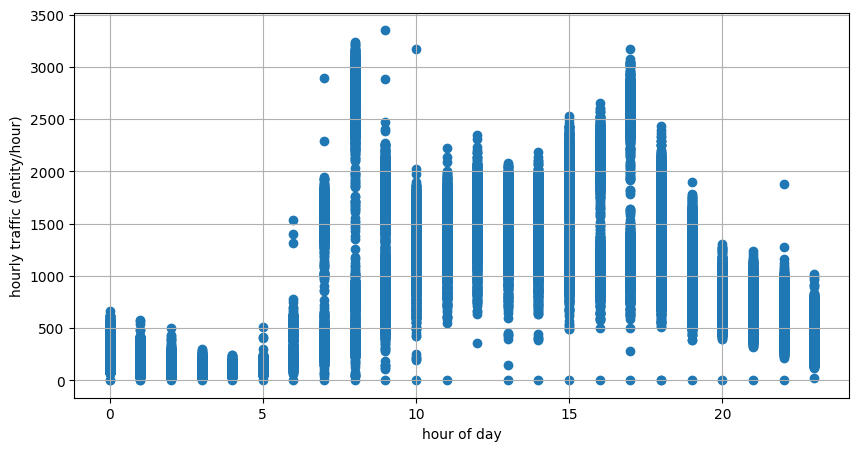

In [25]:
Traffico_Ora = Site_data.copy().drop(columns=['wind_speed_10m','apparent_temperature','holiday','day_of_week','temperature_2m', 'precipitation', 'relative_humidity_2m','cloud_cover'])
Traffico_Ora["date"] = Site_data["date"].dt.hour

plt.figure(figsize=(10,5))
plt.grid()

plt.xlabel("hour of day")
plt.ylabel("hourly traffic (entity/hour)")

plt.scatter(x=Traffico_Ora["date"],y=Traffico_Ora["hourly_traffic"])
plt.savefig('img/Feature_importance/Day_Outlier.svg')

del Traffico_Ora

### Linear HeatMap

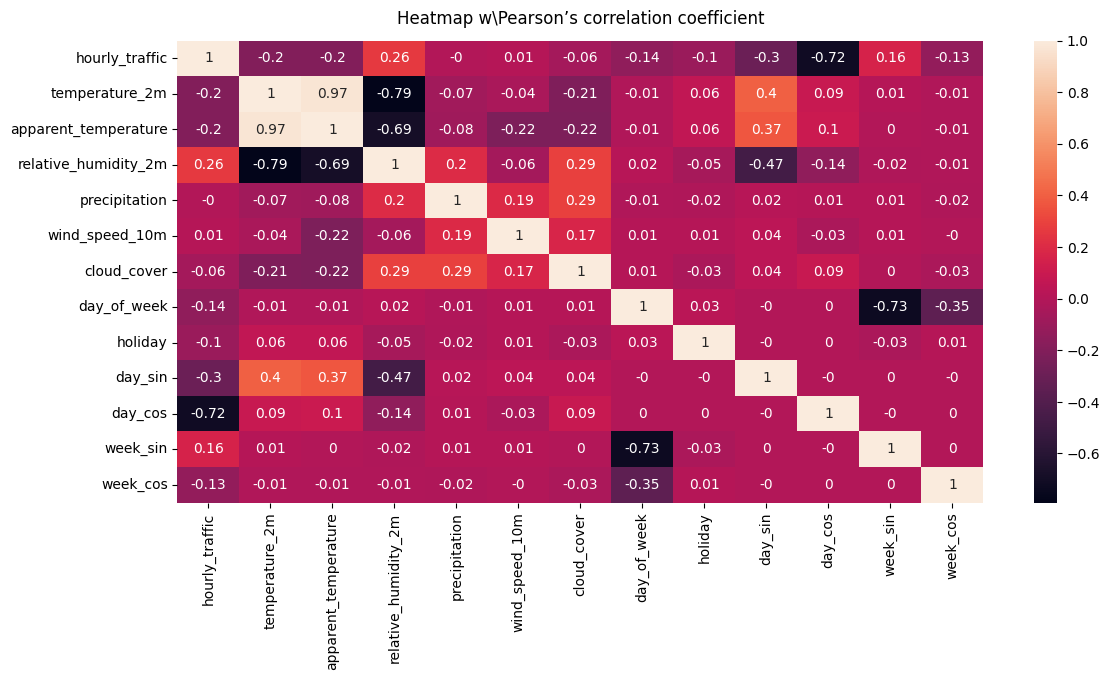

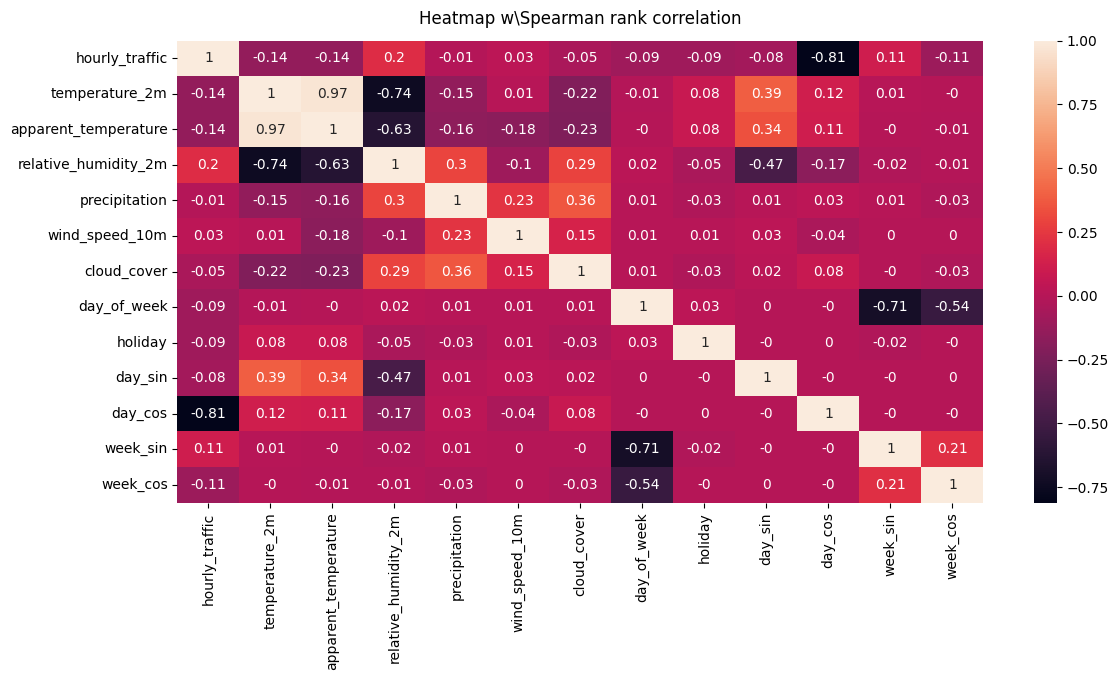

In [26]:
temp = Site_data.copy()
temp["hourly_traffic"] = temp["hourly_traffic"].shift(-1)
# --- --- --- --- pearson
plt.figure(figsize=(13, 6))
rounded_corr_matrix = Site_data.drop(columns=["date"]).corr(method='pearson').round(2)
heatmap = sns.heatmap(rounded_corr_matrix, annot=True)
heatmap.set_title('Heatmap w\\Pearson’s correlation coefficient', fontdict={'fontsize':12}, pad=12)
plt.savefig('img/Feature_importance/Pearson_correlation.svg')
# --- --- --- --- spearman
plt.figure(figsize=(13, 6))
rounded_corr_matrix = temp.drop(columns="date").corr(method='spearman').round(2)
heatmap = sns.heatmap(rounded_corr_matrix, annot=True)
heatmap.set_title('Heatmap w\\Spearman rank correlation', fontdict={'fontsize':12}, pad=12)
plt.savefig('img/Feature_importance/Spearman_correlation.svg')

del rounded_corr_matrix, heatmap, temp